# Imports

In [97]:
import os
import pandas as pd
import numpy as np
import scipy
import pickle
import sys  

# Set Directory Paths

In [98]:
# Location of the data folder
%store -r dataDir

# Location of where the formatted data will be saved to
%store -r layer_dataDir

# Loading Layer Neuron Data

In [99]:
layer_neuron_df = pd.read_excel(os.path.join(dataDir, 'allDATA_byTYPE.xlsx'))[['AutopsyID', 'Hemisphere', 'CorticalType', 'Antibody', 'L23', 'L56', 'ln_L23', 'ln_L56', 'L1-6_NeuN', 'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]

In [100]:
layer_neuron_df

,AutopsyID,Hemisphere,CorticalType,Antibody,L23,L56,ln_L23,ln_L56,L1-6_NeuN,COHORT,CDx_FINAL,AgeatDeath,Sex,ADNC
0,2012-124,R,1,NeuN,0.018765,0.021450,-3.975739,-3.842009,0.018118,TDP,bvFTD,75,Female,a_Not
1,2012-124,R,2,NeuN,0.041831,0.045609,-3.174110,-3.087648,0.041338,TDP,bvFTD,75,Female,a_Not
2,2012-124,R,3,NeuN,0.039480,0.051691,-3.231963,-2.962468,0.041584,TDP,bvFTD,75,Female,a_Not
3,2012-124,R,4,NeuN,0.057420,0.075003,-2.857364,-2.590225,0.060041,TDP,bvFTD,75,Female,a_Not
4,2012-124,R,5,NeuN,0.062987,0.067246,-2.764829,-2.699399,0.064660,TDP,bvFTD,75,Female,a_Not
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2007-003,R,4,SMI32,0.001626,0.000915,-6.421670,-6.996435,0.006295,Tau,bvFTD,84,Male,d_High
1020,2007-003,R,5,SMI32,0.000511,0.000260,-7.578867,-8.254816,0.054301,Tau,bvFTD,84,Male,d_High
1021,2008-001,R,1,SMI32,0.003753,0.003588,-5.585129,-5.630061,0.004638,TDP,bvFTD,73,Male,d_High
1022,2008-001,R,2,SMI32,0.001755,0.003431,-6.345554,-5.675040,0.003809,TDP,bvFTD,73,Male,d_High


## Remove rows where CDx_FINAL = x

In [101]:
layer_neuron_df = layer_neuron_df[layer_neuron_df['CDx_FINAL'] != 'x']

In [102]:
layer_neuron_df

,AutopsyID,Hemisphere,CorticalType,Antibody,L23,L56,ln_L23,ln_L56,L1-6_NeuN,COHORT,CDx_FINAL,AgeatDeath,Sex,ADNC
0,2012-124,R,1,NeuN,0.018765,0.021450,-3.975739,-3.842009,0.018118,TDP,bvFTD,75,Female,a_Not
1,2012-124,R,2,NeuN,0.041831,0.045609,-3.174110,-3.087648,0.041338,TDP,bvFTD,75,Female,a_Not
2,2012-124,R,3,NeuN,0.039480,0.051691,-3.231963,-2.962468,0.041584,TDP,bvFTD,75,Female,a_Not
3,2012-124,R,4,NeuN,0.057420,0.075003,-2.857364,-2.590225,0.060041,TDP,bvFTD,75,Female,a_Not
4,2012-124,R,5,NeuN,0.062987,0.067246,-2.764829,-2.699399,0.064660,TDP,bvFTD,75,Female,a_Not
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2007-003,R,4,SMI32,0.001626,0.000915,-6.421670,-6.996435,0.006295,Tau,bvFTD,84,Male,d_High
1020,2007-003,R,5,SMI32,0.000511,0.000260,-7.578867,-8.254816,0.054301,Tau,bvFTD,84,Male,d_High
1021,2008-001,R,1,SMI32,0.003753,0.003588,-5.585129,-5.630061,0.004638,TDP,bvFTD,73,Male,d_High
1022,2008-001,R,2,SMI32,0.001755,0.003431,-6.345554,-5.675040,0.003809,TDP,bvFTD,73,Male,d_High


## Format into desired format

## Divide into Total neurons (NeuN) vs pyramidal neurons (SMI32)

In [103]:
neuron_type = layer_neuron_df.groupby('Antibody')

# NeuN DataFrame
NeuN_df = neuron_type.get_group('NeuN')
# SMI43 DataFrame
SMI32_df = neuron_type.get_group('SMI32')

In [104]:
NeuN_df

,AutopsyID,Hemisphere,CorticalType,Antibody,L23,L56,ln_L23,ln_L56,L1-6_NeuN,COHORT,CDx_FINAL,AgeatDeath,Sex,ADNC
0,2012-124,R,1,NeuN,0.018765,0.021450,-3.975739,-3.842009,0.018118,TDP,bvFTD,75,Female,a_Not
1,2012-124,R,2,NeuN,0.041831,0.045609,-3.174110,-3.087648,0.041338,TDP,bvFTD,75,Female,a_Not
2,2012-124,R,3,NeuN,0.039480,0.051691,-3.231963,-2.962468,0.041584,TDP,bvFTD,75,Female,a_Not
3,2012-124,R,4,NeuN,0.057420,0.075003,-2.857364,-2.590225,0.060041,TDP,bvFTD,75,Female,a_Not
4,2012-124,R,5,NeuN,0.062987,0.067246,-2.764829,-2.699399,0.064660,TDP,bvFTD,75,Female,a_Not
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2011-269,R,4,NeuN,0.018481,0.013394,-3.991026,-4.312979,0.016286,TDP,bvFTD,76,Male,a_Not
1005,2015-118,L,1,NeuN,0.016836,0.039065,-4.084245,-3.242540,0.028878,TDP,bvFTD,74,Male,b_Low
1006,2015-118,L,2,NeuN,0.040913,0.058419,-3.196299,-2.840116,0.045612,TDP,bvFTD,74,Male,b_Low
1007,2015-118,L,3,NeuN,0.050325,0.066357,-2.989250,-2.712710,0.054620,TDP,bvFTD,74,Male,b_Low


In [105]:
SMI32_df

,AutopsyID,Hemisphere,CorticalType,Antibody,L23,L56,ln_L23,ln_L56,L1-6_NeuN,COHORT,CDx_FINAL,AgeatDeath,Sex,ADNC
5,2002-166,L,1,SMI32,0.001632,0.011737,-6.417769,-4.444993,0.004219,Tau,bvFTD,62,Female,b_Low
6,2002-166,L,2,SMI32,0.002716,0.016679,-5.908697,-4.093610,0.023657,Tau,bvFTD,62,Female,b_Low
7,2002-166,L,3,SMI32,0.006675,0.018840,-5.009377,-3.971748,0.011374,Tau,bvFTD,62,Female,b_Low
8,2002-166,L,4,SMI32,0.003465,0.007404,-5.665035,-4.905717,0.073253,Tau,bvFTD,62,Female,b_Low
9,2002-166,L,5,SMI32,NaN,0.066302,NaN,-2.713530,0.063512,Tau,bvFTD,62,Female,b_Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2007-003,R,4,SMI32,0.001626,0.000915,-6.421670,-6.996435,0.006295,Tau,bvFTD,84,Male,d_High
1020,2007-003,R,5,SMI32,0.000511,0.000260,-7.578867,-8.254816,0.054301,Tau,bvFTD,84,Male,d_High
1021,2008-001,R,1,SMI32,0.003753,0.003588,-5.585129,-5.630061,0.004638,TDP,bvFTD,73,Male,d_High
1022,2008-001,R,2,SMI32,0.001755,0.003431,-6.345554,-5.675040,0.003809,TDP,bvFTD,73,Male,d_High


## NeuN_df - Divide into HC, Tau, TDP

In [106]:
NeuN_cohort_type = NeuN_df.groupby('COHORT')

# NeuN - HC
NeuN_HC_df = NeuN_cohort_type.get_group('HC')

# NeuN - Tau
NeuN_Tau_df = NeuN_cohort_type.get_group('Tau')

# NeuN - TDP
NeuN_TDP_df = NeuN_cohort_type.get_group('TDP')

In [107]:
print(f"Number of rows in NeuN Total: {len(NeuN_df)}")
print(f"Number of rows in NeuN-HC: {len(NeuN_HC_df)}")
print(f"Number of rows in NeuN-Tau: {len(NeuN_Tau_df)}")
print(f"Number of rows in NeuN-TDP: {len(NeuN_TDP_df)}")

Number of rows in NeuN Total: 492
Number of rows in NeuN-HC: 129
Number of rows in NeuN-Tau: 125
Number of rows in NeuN-TDP: 238


## Divide into L, R Hemisphere

In [108]:
# HC
NeuN_HC_hemisphere_type = NeuN_HC_df.groupby('Hemisphere')
NeuN_HC_L_df = NeuN_HC_hemisphere_type.get_group('L')
NeuN_HC_R_df = NeuN_HC_hemisphere_type.get_group('R')

# Tau
NeuN_Tau_hemisphere_type = NeuN_Tau_df.groupby('Hemisphere')
NeuN_Tau_L_df = NeuN_Tau_hemisphere_type.get_group('L')
NeuN_Tau_R_df = NeuN_Tau_hemisphere_type.get_group('R')

# TDP
NeuN_TDP_hemisphere_type = NeuN_TDP_df.groupby('Hemisphere')
NeuN_TDP_L_df = NeuN_TDP_hemisphere_type.get_group('L')
NeuN_TDP_R_df = NeuN_TDP_hemisphere_type.get_group('R')

In [109]:
print(f"Number of rows in NeuN-HC Left: {len(NeuN_HC_L_df)}")
print(f"Number of rows in NeuN-HC Right: {len(NeuN_HC_R_df)}")

print(f"Number of rows in NeuN-Tau Left: {len(NeuN_Tau_L_df)}")
print(f"Number of rows in NeuN-Tau Right: {len(NeuN_Tau_R_df)}")

print(f"Number of rows in NeuN-TDP Left: {len(NeuN_TDP_L_df)}")
print(f"Number of rows in NeuN-TDP Right: {len(NeuN_TDP_R_df)}")

Number of rows in NeuN-HC Left: 71
Number of rows in NeuN-HC Right: 58
Number of rows in NeuN-Tau Left: 65
Number of rows in NeuN-Tau Right: 60
Number of rows in NeuN-TDP Left: 138
Number of rows in NeuN-TDP Right: 100


## SMI32_df - Divide into HC, Tau, TDP

In [110]:
SMI32_cohort_type = SMI32_df.groupby('COHORT')

# SMI32 - HC
SMI32_HC_df = SMI32_cohort_type.get_group('HC')

# SMI32 - Tau
SMI32_Tau_df = SMI32_cohort_type.get_group('Tau')

# SMI32 - TDP
SMI32_TDP_df = SMI32_cohort_type.get_group('TDP')

In [111]:
print(f"Number of rows in SMI32 Total: {len(SMI32_df)}")
print(f"Number of rows in SMI32-HC: {len(SMI32_HC_df)}")
print(f"Number of rows in SMI32-Tau: {len(SMI32_Tau_df)}")
print(f"Number of rows in SMI32-TDP: {len(SMI32_TDP_df)}")

Number of rows in SMI32 Total: 492
Number of rows in SMI32-HC: 129
Number of rows in SMI32-Tau: 127
Number of rows in SMI32-TDP: 236


## Divide into L, R Hemisphere

In [112]:
# HC
SMI32_HC_hemisphere_type = SMI32_HC_df.groupby('Hemisphere')
SMI32_HC_L_df = SMI32_HC_hemisphere_type.get_group('L')
SMI32_HC_R_df = SMI32_HC_hemisphere_type.get_group('R')

# Tau
SMI32_Tau_hemisphere_type = SMI32_Tau_df.groupby('Hemisphere')
SMI32_Tau_L_df = SMI32_Tau_hemisphere_type.get_group('L')
SMI32_Tau_R_df = SMI32_Tau_hemisphere_type.get_group('R')

# TDP
SMI32_TDP_hemisphere_type = SMI32_TDP_df.groupby('Hemisphere')
SMI32_TDP_L_df = SMI32_TDP_hemisphere_type.get_group('L')
SMI32_TDP_R_df = SMI32_TDP_hemisphere_type.get_group('R')

In [113]:
print(f"Number of rows in SMI32-HC Left: {len(SMI32_HC_L_df)}")
print(f"Number of rows in SMI32-HC Right: {len(SMI32_HC_R_df)}")

print(f"Number of rows in SMI32-Tau Left: {len(SMI32_Tau_L_df)}")
print(f"Number of rows in SMI32-Tau Right: {len(SMI32_Tau_R_df)}")

print(f"Number of rows in SMI32-TDP Left: {len(SMI32_TDP_L_df)}")
print(f"Number of rows in SMI32-TDP Right: {len(SMI32_TDP_R_df)}")

Number of rows in SMI32-HC Left: 71
Number of rows in SMI32-HC Right: 58
Number of rows in SMI32-Tau Left: 65
Number of rows in SMI32-Tau Right: 62
Number of rows in SMI32-TDP Left: 140
Number of rows in SMI32-TDP Right: 96


# Load Data to sub-divide Cortical Type 3

In [114]:
subcorticaltype_df = pd.read_excel(os.path.join(dataDir, 'HyungMin_subregion_data.xlsx'))[['COHORT', 'AutopsyID', 'BlockID', 'Hemisphere', 'Subregion', 'Antibody', 'L23', 'L56', 'ln_L23', 'ln_L56']]

In [115]:
subcorticaltype_df

,COHORT,AutopsyID,BlockID,Hemisphere,Subregion,Antibody,L23,L56,ln_L23,ln_L56
0,HC,2007-014,2007-014-37F,L,3d,NeuN,0.053127,0.054737,-2.935070,-2.905214
1,HC,2009-059,2009-059-52F,R,3d,NeuN,0.059030,0.061181,-2.829715,-2.793919
2,HC,2010-011,2010-011-38F,R,3d,NeuN,0.088594,0.078032,-2.423687,-2.550630
3,HC,2010-203,2010-203-34F,L,3d,NeuN,0.065789,0.048778,-2.721307,-3.020466
4,HC,2011-141,2011-141-37F,L,3d,NeuN,0.067214,0.058368,-2.699876,-2.840985
...,...,...,...,...,...,...,...,...,...,...
272,TDP,2017-149,2017-149-26F,L,3v,SMI32,0.001180,0.004517,-6.742615,-5.400013
273,TDP,2018-129,2018-129-43F,R,3v,SMI32,0.005806,0.035599,-5.148871,-3.335444
274,TDP,2018-146,2018-146-62F,L,3v,SMI32,0.002274,0.010131,-6.086159,-4.592188
275,TDP,2018-146,2018-146-26F,R,3v,SMI32,0.003161,0.004536,-5.756732,-5.395680


In [116]:
# Divide into NeuN vs SMI32
subcorticaltype = subcorticaltype_df.groupby('Antibody')

subcorticaltype_NeuN = subcorticaltype.get_group('NeuN')
subcorticaltype_SMI32 = subcorticaltype.get_group('SMI32')

# Divide into HC, TAU, TDP / L, R
subcorticaltype_NeuN_pathtype = subcorticaltype_NeuN.groupby(['COHORT', 'Hemisphere'])
subcorticaltype_SMI32_pathtype = subcorticaltype_SMI32.groupby(['COHORT', 'Hemisphere'])

# NeuN
subcorticaltype_NeuN_HC_L = subcorticaltype_NeuN_pathtype.get_group(('HC', 'L'))
subcorticaltype_NeuN_HC_R = subcorticaltype_NeuN_pathtype.get_group(('HC', 'R'))
subcorticaltype_NeuN_TAU_L = subcorticaltype_NeuN_pathtype.get_group(('Tau', 'L'))
subcorticaltype_NeuN_TAU_R = subcorticaltype_NeuN_pathtype.get_group(('Tau', 'R'))
subcorticaltype_NeuN_TDP_L = subcorticaltype_NeuN_pathtype.get_group(('TDP', 'L'))
subcorticaltype_NeuN_TDP_R = subcorticaltype_NeuN_pathtype.get_group(('TDP', 'R'))

# SMI32
subcorticaltype_SMI32_HC_L = subcorticaltype_SMI32_pathtype.get_group(('HC', 'L'))
subcorticaltype_SMI32_HC_R = subcorticaltype_SMI32_pathtype.get_group(('HC', 'R'))
subcorticaltype_SMI32_TAU_L = subcorticaltype_SMI32_pathtype.get_group(('Tau', 'L'))
subcorticaltype_SMI32_TAU_R = subcorticaltype_SMI32_pathtype.get_group(('Tau', 'R'))
subcorticaltype_SMI32_TDP_L = subcorticaltype_SMI32_pathtype.get_group(('TDP', 'L'))
subcorticaltype_SMI32_TDP_R = subcorticaltype_SMI32_pathtype.get_group(('TDP', 'R'))



# Merge between Dataset

## NeuN HC

In [117]:
data = NeuN_HC_L_df
data_subtype = subcorticaltype_NeuN_HC_L

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

NeuN_HC_L_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
NeuN_HC_L_df['CorticalType'] = NeuN_HC_L_df['CorticalType'].astype(str)


data = NeuN_HC_R_df
data_subtype = subcorticaltype_NeuN_HC_R

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

NeuN_HC_R_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
NeuN_HC_R_df['CorticalType'] = NeuN_HC_R_df['CorticalType'].astype(str)

## NeuN TAU

In [118]:
data = NeuN_Tau_L_df
data_subtype = subcorticaltype_NeuN_TAU_L

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

NeuN_Tau_L_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
NeuN_Tau_L_df['CorticalType'] = NeuN_Tau_L_df['CorticalType'].astype(str)

data = NeuN_Tau_R_df
data_subtype = subcorticaltype_NeuN_TAU_R

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

NeuN_Tau_R_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
NeuN_Tau_R_df['CorticalType'] = NeuN_Tau_R_df['CorticalType'].astype(str)

## NeuN TDP

In [119]:
data = NeuN_TDP_L_df
data_subtype = subcorticaltype_NeuN_TDP_L

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

NeuN_TDP_L_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
NeuN_TDP_L_df['CorticalType'] = NeuN_TDP_L_df['CorticalType'].astype(str)

data = NeuN_TDP_R_df
data_subtype = subcorticaltype_NeuN_TDP_R

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

NeuN_TDP_R_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
NeuN_TDP_R_df['CorticalType'] = NeuN_TDP_R_df['CorticalType'].astype(str)

## SMI32 HC

In [120]:
data = SMI32_HC_L_df
data_subtype = subcorticaltype_SMI32_HC_L

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

SMI32_HC_L_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
SMI32_HC_L_df['CorticalType'] = SMI32_HC_L_df['CorticalType'].astype(str)


data = SMI32_HC_R_df
data_subtype = subcorticaltype_SMI32_HC_R

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

SMI32_HC_R_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
SMI32_HC_R_df['CorticalType'] = SMI32_HC_R_df['CorticalType'].astype(str)

## SMI32 TAU

In [121]:
data = SMI32_Tau_L_df
data_subtype = subcorticaltype_SMI32_TAU_L

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

SMI32_Tau_L_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
SMI32_Tau_L_df['CorticalType'] = SMI32_Tau_L_df['CorticalType'].astype(str)

data = SMI32_Tau_R_df
data_subtype = subcorticaltype_SMI32_TAU_R

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

SMI32_Tau_R_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
SMI32_Tau_R_df['CorticalType'] = SMI32_Tau_R_df['CorticalType'].astype(str)

## SMI32 TDP

In [122]:
data = SMI32_TDP_L_df
data_subtype = subcorticaltype_SMI32_TDP_L

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

SMI32_TDP_L_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
SMI32_TDP_L_df['CorticalType'] = SMI32_TDP_L_df['CorticalType'].astype(str)

data = SMI32_TDP_R_df
data_subtype = subcorticaltype_SMI32_TDP_R

# Get the subdivided Cortical Type 3
ct3_subdivide_df = pd.merge(data[data['CorticalType'] == 3], data_subtype, left_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'], right_on=['AutopsyID', 'Hemisphere', 'Antibody', 'COHORT'])[['AutopsyID', 'Hemisphere', 'Subregion', 'Antibody',	
                                                                                                                                                                                'L23_y', 'L56_y', 'ln_L23_y', 'ln_L56_y', 'L1-6_NeuN',
                                                                                                                                                                                'COHORT', 'CDx_FINAL', 'AgeatDeath', 'Sex', 'ADNC']]
ct3_subdivide_df = ct3_subdivide_df.rename(columns={'Subregion': 'CorticalType', 'L23_y': 'L23', 'L56_y': 'L56', 'ln_L23_y': 'ln_L23', 'ln_L56_y': 'ln_L56'})

# Delete rows where CorticalType == 3
data = data[data['CorticalType'] != 3]

SMI32_TDP_R_df = pd.concat([data, ct3_subdivide_df], ignore_index=True)
SMI32_TDP_R_df['CorticalType'] = SMI32_TDP_R_df['CorticalType'].astype(str)

## Formatting NeuN_HC_df, NeuN_Tau_df, NeuN_TDP_df $\rightarrow$ L23 & L56 (L & R divided)

### NeuN_HC_df to numpy

In [123]:
# L + R
NeuN_HC_IDs = np.sort(NeuN_HC_df['AutopsyID'].unique())
print(NeuN_HC_IDs)
print(f"Number of unique IDs in Neun HC: {len(NeuN_HC_IDs)}")

['2007-014' '2009-059' '2010-011' '2010-177' '2010-203' '2011-141'
 '2011-255' '2012-075' '2012-118' '2012-174' '2012-193' '2013-036'
 '2013-039' '2013-092' '2013-147' '2013-165' '2013-172' '2013-189'
 '2013-235' '2014-006' '2014-100' '2014-191' '2014-192' '2014-241'
 '2015-033' '2015-137' '2015-192' '2015-198' '2015-219' '2016-071'
 '2016-113' '2017-191']
Number of unique IDs in Neun HC: 32


In [124]:
# Left
NeuN_HC_L_IDs = np.sort(NeuN_HC_L_df['AutopsyID'].unique())
print(NeuN_HC_L_IDs)
print(f"Number of unique IDs in Neun HC Left: {len(NeuN_HC_L_IDs)}")

# Right
NeuN_HC_R_IDs = np.sort(NeuN_HC_R_df['AutopsyID'].unique())
print(NeuN_HC_R_IDs)
print(f"Number of unique IDs in Neun HC Right: {len(NeuN_HC_R_IDs)}")

['2007-014' '2010-177' '2010-203' '2011-141' '2012-075' '2012-193'
 '2013-039' '2013-147' '2013-165' '2013-189' '2013-235' '2014-191'
 '2014-241' '2015-033' '2015-137' '2015-219' '2016-113' '2017-191']
Number of unique IDs in Neun HC Left: 18
['2009-059' '2010-011' '2011-255' '2012-118' '2012-174' '2013-036'
 '2013-092' '2013-172' '2014-006' '2014-100' '2014-192' '2015-192'
 '2015-198' '2016-071']
Number of unique IDs in Neun HC Right: 14


In [125]:
L_R = pd.DataFrame({'L_R': NeuN_HC_IDs})
L = pd.DataFrame({'L': NeuN_HC_L_IDs})
R = pd.DataFrame({'R': NeuN_HC_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,2007-014,2007-014,NaN
1,2009-059,NaN,2009-059
2,2010-011,NaN,2010-011
3,2010-177,2010-177,NaN
4,2010-203,2010-203,NaN
5,2011-141,2011-141,NaN
6,2011-255,NaN,2011-255
7,2012-075,2012-075,NaN
8,2012-118,NaN,2012-118
9,2012-174,NaN,2012-174


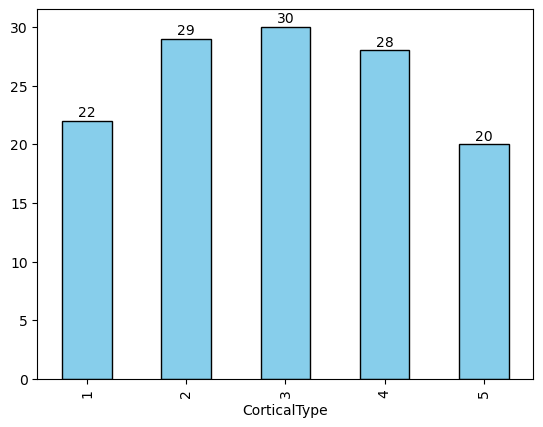

In [126]:
value_counts = NeuN_HC_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

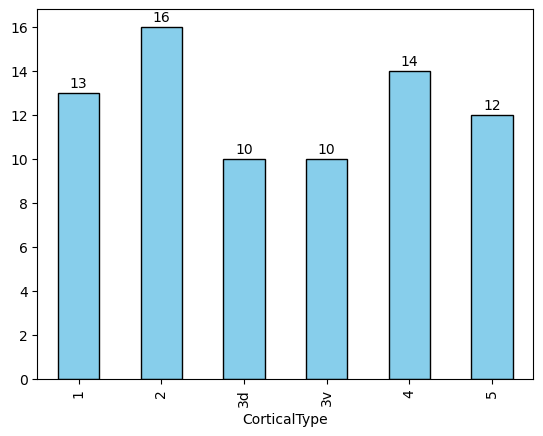

In [127]:
value_counts = NeuN_HC_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

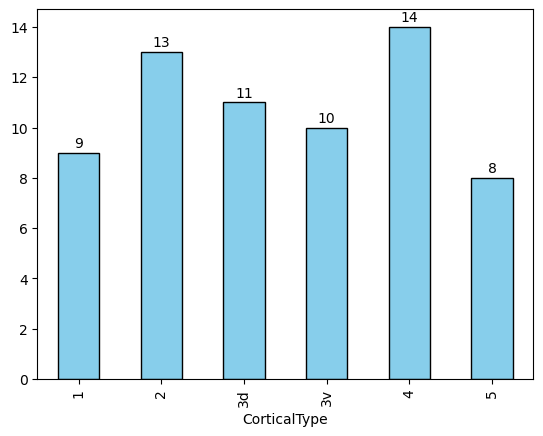

In [128]:
value_counts = NeuN_HC_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [129]:
NeuN_HC_formatted_L = pd.pivot_table(NeuN_HC_L_df, values=['L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

# Right
NeuN_HC_formatted_R = pd.pivot_table(NeuN_HC_R_df, values=['L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

In [130]:
# Left
NeuN_HC_L = NeuN_HC_formatted_L.to_numpy()
print(f"Shape of Neun_HC Left numpy data: {NeuN_HC_L.shape}")

# Right
NeuN_HC_R = NeuN_HC_formatted_R.to_numpy()
print(f"Shape of Neun_HC Right numpy data: {NeuN_HC_R.shape}")

Shape of Neun_HC Left numpy data: (18, 12)
Shape of Neun_HC Right numpy data: (14, 12)


#### Get Age, Sex, and L1-6_NeuN

In [131]:
formatted_data_L = pd.pivot_table(NeuN_HC_L_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

NeuN_HC_Age_L = formatted_data_L.index.get_level_values('AgeatDeath').tolist()
NeuN_HC_Sex_L = formatted_data_L.index.get_level_values('Sex').tolist()
NeuN_HC_ADNC_L = formatted_data_L.index.get_level_values('ADNC').tolist()
NeuN_HC_NeuN_1_L = formatted_data_L.reset_index()['L1-6_NeuN']['1'].tolist()
NeuN_HC_NeuN_2_L = formatted_data_L.reset_index()['L1-6_NeuN']['2'].tolist()
NeuN_HC_NeuN_3d_L = formatted_data_L.reset_index()['L1-6_NeuN']['3d'].tolist()
NeuN_HC_NeuN_3v_L = formatted_data_L.reset_index()['L1-6_NeuN']['3v'].tolist()
NeuN_HC_NeuN_4_L = formatted_data_L.reset_index()['L1-6_NeuN']['4'].tolist()
NeuN_HC_NeuN_5_L = formatted_data_L.reset_index()['L1-6_NeuN']['5'].tolist()

formatted_data_R = pd.pivot_table(NeuN_HC_R_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

NeuN_HC_Age_R = formatted_data_R.index.get_level_values('AgeatDeath').tolist()
NeuN_HC_Sex_R = formatted_data_R.index.get_level_values('Sex').tolist()
NeuN_HC_ADNC_R = formatted_data_R.index.get_level_values('ADNC').tolist()
NeuN_HC_NeuN_1_R = formatted_data_R.reset_index()['L1-6_NeuN']['1'].tolist()
NeuN_HC_NeuN_2_R = formatted_data_R.reset_index()['L1-6_NeuN']['2'].tolist()
NeuN_HC_NeuN_3d_R = formatted_data_R.reset_index()['L1-6_NeuN']['3d'].tolist()
NeuN_HC_NeuN_3v_R = formatted_data_R.reset_index()['L1-6_NeuN']['3v'].tolist()
NeuN_HC_NeuN_4_R = formatted_data_R.reset_index()['L1-6_NeuN']['4'].tolist()
NeuN_HC_NeuN_5_R = formatted_data_R.reset_index()['L1-6_NeuN']['5'].tolist()

### NeuN_Tau_df to numpy

In [132]:
# L+R
NeuN_Tau_IDs = np.sort(NeuN_Tau_df['AutopsyID'].unique())
print(NeuN_Tau_IDs)
print(f"Number of unique IDs in Neun Tau: {len(NeuN_Tau_IDs)}")

['1995-222' '1996-173' '2000-216' '2002-166' '2003-032' '2006-027'
 '2007-003' '2007-101' '2008-166' '2008-251' '2009-102' '2009-248'
 '2010-015' '2010-209' '2011-060' '2012-046' '2012-238' '2013-018'
 '2013-071' '2013-108' '2013-223' '2014-052' '2014-145' '2014-212'
 '2015-009' '2017-109' '2017-187']
Number of unique IDs in Neun Tau: 27


In [133]:
# Left
NeuN_Tau_L_IDs = np.sort(NeuN_Tau_L_df['AutopsyID'].unique())
print(NeuN_Tau_L_IDs)
print(f"Number of unique IDs in Neun Tau Left: {len(NeuN_Tau_L_IDs)}")

# Right
NeuN_Tau_R_IDs = np.sort(NeuN_Tau_R_df['AutopsyID'].unique())
print(NeuN_Tau_R_IDs)
print(f"Number of unique IDs in Neun Tau RIght: {len(NeuN_Tau_R_IDs)}")

['1996-173' '2000-216' '2002-166' '2006-027' '2008-251' '2009-248'
 '2010-209' '2012-238' '2013-018' '2013-071' '2013-223' '2014-145'
 '2014-212' '2015-009' '2017-109' '2017-187']
Number of unique IDs in Neun Tau Left: 16
['1995-222' '2003-032' '2007-003' '2007-101' '2008-166' '2009-102'
 '2010-015' '2011-060' '2012-046' '2012-238' '2013-018' '2013-071'
 '2013-108' '2014-052' '2014-145' '2014-212']
Number of unique IDs in Neun Tau RIght: 16


In [134]:
L_R = pd.DataFrame({'L_R': NeuN_Tau_IDs})
L = pd.DataFrame({'L': NeuN_Tau_L_IDs})
R = pd.DataFrame({'R': NeuN_Tau_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,1995-222,NaN,1995-222
1,1996-173,1996-173,NaN
2,2000-216,2000-216,NaN
3,2002-166,2002-166,NaN
4,2003-032,NaN,2003-032
5,2006-027,2006-027,NaN
6,2007-003,NaN,2007-003
7,2007-101,NaN,2007-101
8,2008-166,NaN,2008-166
9,2008-251,2008-251,NaN


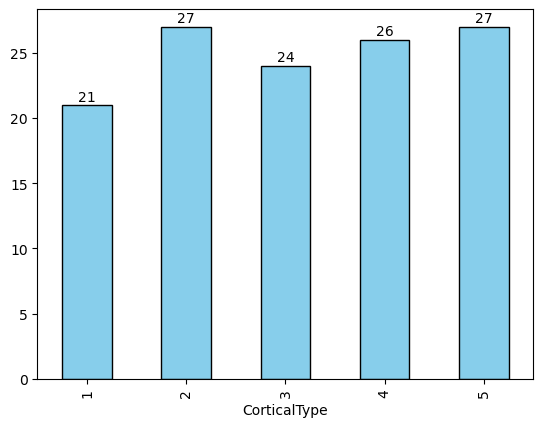

In [135]:
value_counts = NeuN_Tau_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

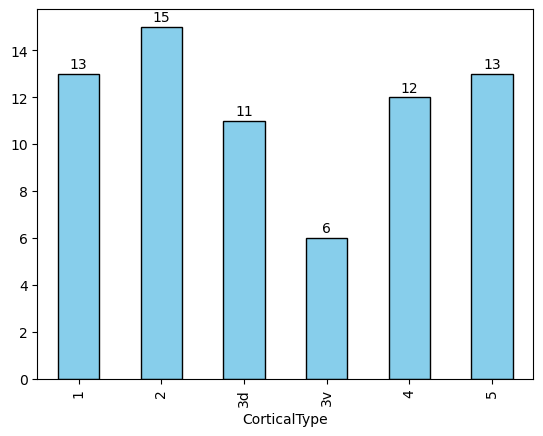

In [136]:
value_counts = NeuN_Tau_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

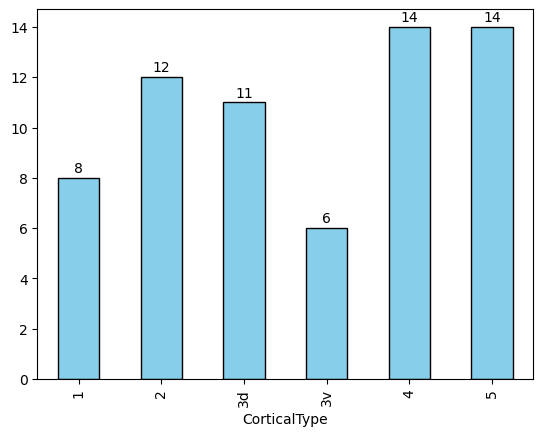

In [137]:
value_counts = NeuN_Tau_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [138]:
# Left
NeuN_Tau_L_formatted = pd.pivot_table(NeuN_Tau_L_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
NeuN_Tau_R_formatted = pd.pivot_table(NeuN_Tau_R_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [139]:
# Left
NeuN_Tau_L = NeuN_Tau_L_formatted.to_numpy()
print(f"Shape of NeuN_Tau Left numpy data: {NeuN_Tau_L.shape}")

# Right
NeuN_Tau_R = NeuN_Tau_R_formatted.to_numpy()
print(f"Shape of NeuN_Tau Right numpy data: {NeuN_Tau_R.shape}")

Shape of NeuN_Tau Left numpy data: (16, 12)
Shape of NeuN_Tau Right numpy data: (16, 12)


#### Get Age, Sex, and L1-6_NeuN

In [140]:
formatted_data_L = pd.pivot_table(NeuN_Tau_L_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

NeuN_Tau_Age_L = formatted_data_L.index.get_level_values('AgeatDeath').tolist()
NeuN_Tau_Sex_L = formatted_data_L.index.get_level_values('Sex').tolist()
NeuN_Tau_ADNC_L = formatted_data_L.index.get_level_values('ADNC').tolist()
NeuN_Tau_NeuN_1_L = formatted_data_L.reset_index()['L1-6_NeuN']['1'].tolist()
NeuN_Tau_NeuN_2_L = formatted_data_L.reset_index()['L1-6_NeuN']['2'].tolist()
NeuN_Tau_NeuN_3d_L = formatted_data_L.reset_index()['L1-6_NeuN']['3d'].tolist()
NeuN_Tau_NeuN_3v_L = formatted_data_L.reset_index()['L1-6_NeuN']['3v'].tolist()
NeuN_Tau_NeuN_4_L = formatted_data_L.reset_index()['L1-6_NeuN']['4'].tolist()
NeuN_Tau_NeuN_5_L = formatted_data_L.reset_index()['L1-6_NeuN']['5'].tolist()

formatted_data_R = pd.pivot_table(NeuN_Tau_R_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

NeuN_Tau_Age_R = formatted_data_R.index.get_level_values('AgeatDeath').tolist()
NeuN_Tau_Sex_R = formatted_data_R.index.get_level_values('Sex').tolist()
NeuN_Tau_ADNC_R = formatted_data_R.index.get_level_values('ADNC').tolist()
NeuN_Tau_NeuN_1_R = formatted_data_R.reset_index()['L1-6_NeuN']['1'].tolist()
NeuN_Tau_NeuN_2_R = formatted_data_R.reset_index()['L1-6_NeuN']['2'].tolist()
NeuN_Tau_NeuN_3d_R = formatted_data_R.reset_index()['L1-6_NeuN']['3d'].tolist()
NeuN_Tau_NeuN_3v_R = formatted_data_R.reset_index()['L1-6_NeuN']['3v'].tolist()
NeuN_Tau_NeuN_4_R = formatted_data_R.reset_index()['L1-6_NeuN']['4'].tolist()
NeuN_Tau_NeuN_5_R = formatted_data_R.reset_index()['L1-6_NeuN']['5'].tolist()

### NeuN_TDP_df to numpy

In [141]:
# L+R
NeuN_TDP_IDs = np.sort(NeuN_TDP_df['AutopsyID'].unique())
print(NeuN_TDP_IDs)
print(f"Number of unique IDs in Neun TDP: {len(NeuN_TDP_IDs)}")

['1995-005' '1995-217' '1999-170' '2000-149' '2001-108' '2001-122'
 '2002-025' '2002-070' '2002-238' '2003-044' '2003-114' '2004-008'
 '2004-158' '2005-208' '2006-123' '2007-039' '2007-111' '2007-148'
 '2008-001' '2008-156' '2008-205' '2009-033' '2009-097' '2009-119'
 '2009-168' '2011-191' '2011-257' '2011-269' '2012-124' '2014-087'
 '2015-008' '2015-044' '2015-062' '2015-116' '2015-118' '2016-009'
 '2016-037' '2016-161' '2016-165' '2016-241' '2017-149' '2017-190'
 '2018-066' '2018-129' '2018-146' '2018-178' '2018-208']
Number of unique IDs in Neun TDP: 47


In [142]:
# Left
NeuN_TDP_L_IDs = np.sort(NeuN_TDP_L_df['AutopsyID'].unique())
print(NeuN_TDP_L_IDs)
print(f"Number of unique IDs in Neun TDP Left: {len(NeuN_TDP_L_IDs)}")

# Right
NeuN_TDP_R_IDs = np.sort(NeuN_TDP_R_df['AutopsyID'].unique())
print(NeuN_TDP_R_IDs)
print(f"Number of unique IDs in Neun TDP Right: {len(NeuN_TDP_R_IDs)}")

['1999-170' '2001-108' '2001-122' '2002-025' '2002-238' '2003-044'
 '2003-114' '2004-008' '2004-158' '2005-208' '2007-039' '2007-148'
 '2008-205' '2009-033' '2009-097' '2009-168' '2011-191' '2011-257'
 '2011-269' '2015-008' '2015-044' '2015-062' '2015-118' '2016-009'
 '2016-037' '2016-161' '2016-165' '2016-241' '2017-149' '2018-129'
 '2018-146' '2018-178' '2018-208']
Number of unique IDs in Neun TDP Left: 33
['1995-005' '1995-217' '2000-149' '2002-070' '2005-208' '2006-123'
 '2007-111' '2008-001' '2008-156' '2009-033' '2009-119' '2009-168'
 '2011-257' '2011-269' '2012-124' '2014-087' '2015-008' '2015-044'
 '2015-062' '2015-116' '2015-118' '2016-009' '2016-161' '2017-190'
 '2018-066' '2018-129' '2018-146' '2018-208']
Number of unique IDs in Neun TDP Right: 28


In [143]:
L_R = pd.DataFrame({'L_R': NeuN_TDP_IDs})
L = pd.DataFrame({'L': NeuN_TDP_L_IDs})
R = pd.DataFrame({'R': NeuN_TDP_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,1995-005,NaN,1995-005
1,1995-217,NaN,1995-217
2,1999-170,1999-170,NaN
3,2000-149,NaN,2000-149
4,2001-108,2001-108,NaN
5,2001-122,2001-122,NaN
6,2002-025,2002-025,NaN
7,2002-070,NaN,2002-070
8,2002-238,2002-238,NaN
9,2003-044,2003-044,NaN


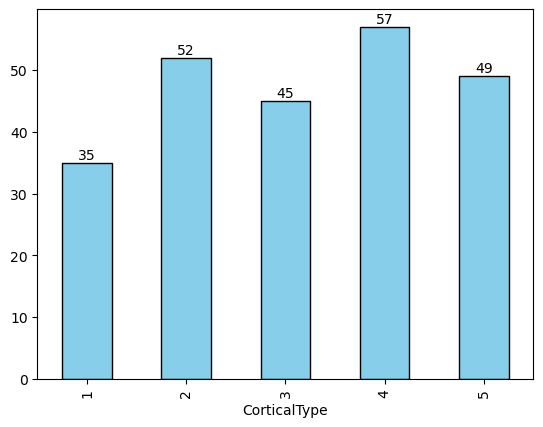

In [144]:
value_counts = NeuN_TDP_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

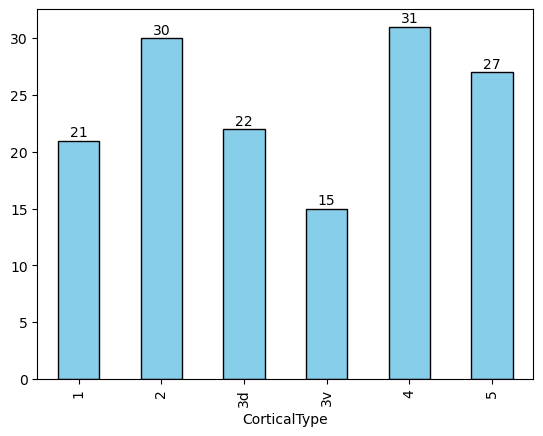

In [145]:
value_counts = NeuN_TDP_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

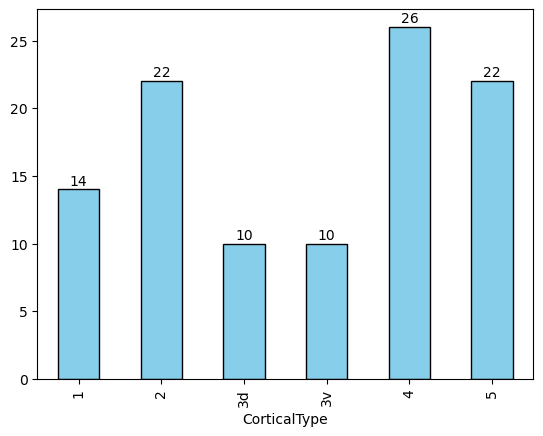

In [146]:
value_counts = NeuN_TDP_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [147]:
# Left
NeuN_TDP_L_formatted = pd.pivot_table(NeuN_TDP_L_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
NeuN_TDP_R_formatted = pd.pivot_table(NeuN_TDP_R_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [148]:
# Left
NeuN_TDP_L = NeuN_TDP_L_formatted.to_numpy()
print(f"Shape of NeuN_TDP Left numpy data: {NeuN_TDP_L.shape}")

# Right
NeuN_TDP_R = NeuN_TDP_R_formatted.to_numpy()
print(f"Shape of NeuN_TDP Right numpy data: {NeuN_TDP_R.shape}")

Shape of NeuN_TDP Left numpy data: (33, 12)
Shape of NeuN_TDP Right numpy data: (28, 12)


#### Get Age, Sex, and L1-6_NeuN

In [149]:
formatted_data_L = pd.pivot_table(NeuN_TDP_L_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

NeuN_TDP_Age_L = formatted_data_L.index.get_level_values('AgeatDeath').tolist()
NeuN_TDP_Sex_L = formatted_data_L.index.get_level_values('Sex').tolist()
NeuN_TDP_ADNC_L = formatted_data_L.index.get_level_values('ADNC').tolist()
NeuN_TDP_NeuN_1_L = formatted_data_L.reset_index()['L1-6_NeuN']['1'].tolist()
NeuN_TDP_NeuN_2_L = formatted_data_L.reset_index()['L1-6_NeuN']['2'].tolist()
NeuN_TDP_NeuN_3d_L = formatted_data_L.reset_index()['L1-6_NeuN']['3d'].tolist()
NeuN_TDP_NeuN_3v_L = formatted_data_L.reset_index()['L1-6_NeuN']['3v'].tolist()
NeuN_TDP_NeuN_4_L = formatted_data_L.reset_index()['L1-6_NeuN']['4'].tolist()
NeuN_TDP_NeuN_5_L = formatted_data_L.reset_index()['L1-6_NeuN']['5'].tolist()

formatted_data_R = pd.pivot_table(NeuN_TDP_R_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

NeuN_TDP_Age_R = formatted_data_R.index.get_level_values('AgeatDeath').tolist()
NeuN_TDP_Sex_R = formatted_data_R.index.get_level_values('Sex').tolist()
NeuN_TDP_ADNC_R = formatted_data_R.index.get_level_values('ADNC').tolist()
NeuN_TDP_NeuN_1_R = formatted_data_R.reset_index()['L1-6_NeuN']['1'].tolist()
NeuN_TDP_NeuN_2_R = formatted_data_R.reset_index()['L1-6_NeuN']['2'].tolist()
NeuN_TDP_NeuN_3d_R = formatted_data_R.reset_index()['L1-6_NeuN']['3d'].tolist()
NeuN_TDP_NeuN_3v_R = formatted_data_R.reset_index()['L1-6_NeuN']['3v'].tolist()
NeuN_TDP_NeuN_4_R = formatted_data_R.reset_index()['L1-6_NeuN']['4'].tolist()
NeuN_TDP_NeuN_5_R = formatted_data_R.reset_index()['L1-6_NeuN']['5'].tolist()

## Formatting SMI32_HC_df, SMI32_Tau_df, SMI32_TDP_df $\rightarrow$ ln_L23 & ln_L56

### SMI32_HC_df to numpy

In [150]:
# L+R
SMI32_HC_IDs = np.sort(SMI32_HC_df['AutopsyID'].unique())
print(SMI32_HC_IDs)
print(f"Number of unique IDs in SMI32 HC: {len(SMI32_HC_IDs)}")

['2007-014' '2009-059' '2010-011' '2010-177' '2010-203' '2011-141'
 '2011-255' '2012-075' '2012-118' '2012-174' '2012-193' '2013-036'
 '2013-039' '2013-092' '2013-147' '2013-165' '2013-172' '2013-189'
 '2013-235' '2014-006' '2014-100' '2014-191' '2014-192' '2014-241'
 '2015-033' '2015-137' '2015-192' '2015-198' '2015-219' '2016-071'
 '2016-113' '2017-191']
Number of unique IDs in SMI32 HC: 32


In [151]:
# Left
SMI32_HC_L_IDs = np.sort(SMI32_HC_L_df['AutopsyID'].unique())
print(SMI32_HC_L_IDs)
print(f"Number of unique IDs in SMI32 HC Left: {len(SMI32_HC_L_IDs)}")

# Right
SMI32_HC_R_IDs = np.sort(SMI32_HC_R_df['AutopsyID'].unique())
print(SMI32_HC_R_IDs)
print(f"Number of unique IDs in SMI32 HC Right: {len(SMI32_HC_R_IDs)}")

['2007-014' '2010-177' '2010-203' '2011-141' '2012-075' '2012-193'
 '2013-039' '2013-147' '2013-165' '2013-189' '2013-235' '2014-191'
 '2014-241' '2015-033' '2015-137' '2015-219' '2016-113' '2017-191']
Number of unique IDs in SMI32 HC Left: 18
['2009-059' '2010-011' '2011-255' '2012-118' '2012-174' '2013-036'
 '2013-092' '2013-172' '2014-006' '2014-100' '2014-192' '2015-192'
 '2015-198' '2016-071']
Number of unique IDs in SMI32 HC Right: 14


In [152]:
L_R = pd.DataFrame({'L_R': SMI32_HC_IDs})
L = pd.DataFrame({'L': SMI32_HC_L_IDs})
R = pd.DataFrame({'R': SMI32_HC_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,2007-014,2007-014,NaN
1,2009-059,NaN,2009-059
2,2010-011,NaN,2010-011
3,2010-177,2010-177,NaN
4,2010-203,2010-203,NaN
5,2011-141,2011-141,NaN
6,2011-255,NaN,2011-255
7,2012-075,2012-075,NaN
8,2012-118,NaN,2012-118
9,2012-174,NaN,2012-174


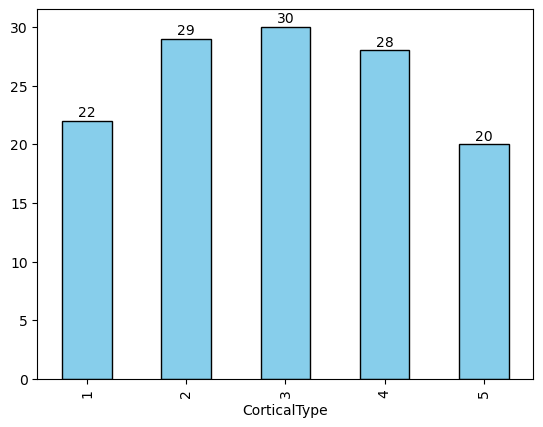

In [153]:
value_counts = SMI32_HC_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

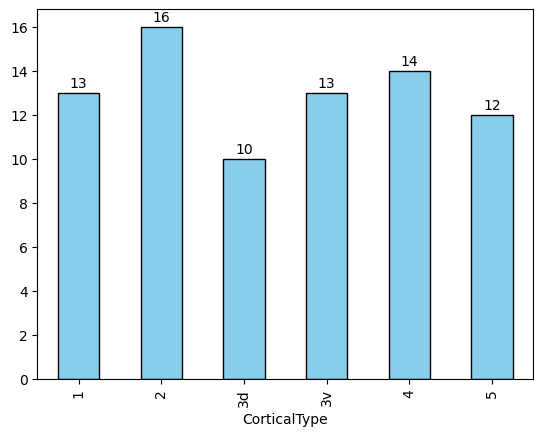

In [154]:
value_counts = SMI32_HC_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

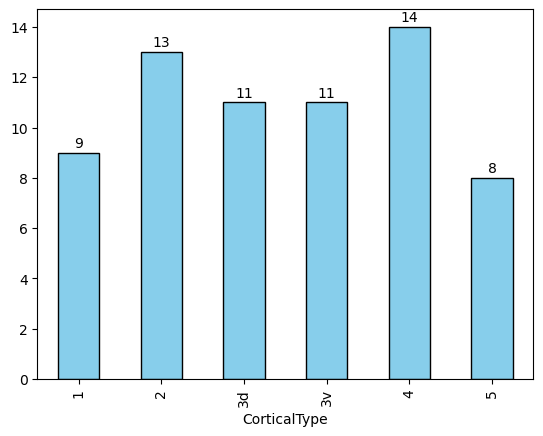

In [155]:
value_counts = SMI32_HC_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [156]:
# Left
SMI32_HC_L_formatted = pd.pivot_table(SMI32_HC_L_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
SMI32_HC_R_formatted = pd.pivot_table(SMI32_HC_R_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [157]:
# Left
SMI32_HC_L = SMI32_HC_L_formatted.to_numpy()
print(f"Shape of SMI32_HC Left numpy data: {SMI32_HC_L.shape}")

# Right
SMI32_HC_R = SMI32_HC_R_formatted.to_numpy()
print(f"Shape of SMI32_HC Right numpy data: {SMI32_HC_R.shape}")

Shape of SMI32_HC Left numpy data: (18, 12)
Shape of SMI32_HC Right numpy data: (14, 12)


#### Get Age, Sex, and L1-6_NeuN

In [158]:
formatted_data_L = pd.pivot_table(SMI32_HC_L_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

SMI32_HC_Age_L = formatted_data_L.index.get_level_values('AgeatDeath').tolist()
SMI32_HC_Sex_L = formatted_data_L.index.get_level_values('Sex').tolist()
SMI32_HC_ADNC_L = formatted_data_L.index.get_level_values('ADNC').tolist()
SMI32_HC_NeuN_1_L = formatted_data_L.reset_index()['L1-6_NeuN']['1'].tolist()
SMI32_HC_NeuN_2_L = formatted_data_L.reset_index()['L1-6_NeuN']['2'].tolist()
SMI32_HC_NeuN_3d_L = formatted_data_L.reset_index()['L1-6_NeuN']['3d'].tolist()
SMI32_HC_NeuN_3v_L = formatted_data_L.reset_index()['L1-6_NeuN']['3v'].tolist()
SMI32_HC_NeuN_4_L = formatted_data_L.reset_index()['L1-6_NeuN']['4'].tolist()
SMI32_HC_NeuN_5_L = formatted_data_L.reset_index()['L1-6_NeuN']['5'].tolist()

formatted_data_R = pd.pivot_table(SMI32_HC_R_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

SMI32_HC_Age_R = formatted_data_R.index.get_level_values('AgeatDeath').tolist()
SMI32_HC_Sex_R = formatted_data_R.index.get_level_values('Sex').tolist()
SMI32_HC_ADNC_R = formatted_data_R.index.get_level_values('ADNC').tolist()
SMI32_HC_NeuN_1_R = formatted_data_R.reset_index()['L1-6_NeuN']['1'].tolist()
SMI32_HC_NeuN_2_R = formatted_data_R.reset_index()['L1-6_NeuN']['2'].tolist()
SMI32_HC_NeuN_3d_R = formatted_data_R.reset_index()['L1-6_NeuN']['3d'].tolist()
SMI32_HC_NeuN_3v_R = formatted_data_R.reset_index()['L1-6_NeuN']['3v'].tolist()
SMI32_HC_NeuN_4_R = formatted_data_R.reset_index()['L1-6_NeuN']['4'].tolist()
SMI32_HC_NeuN_5_R = formatted_data_R.reset_index()['L1-6_NeuN']['5'].tolist()

### SMI32_Tau_df to numpy

In [159]:
# L+R
SMI32_Tau_IDs = np.sort(SMI32_Tau_df['AutopsyID'].unique())
print(SMI32_Tau_IDs)
print(f"Number of unique IDs in SMI32 Tau: {len(SMI32_Tau_IDs)}")

['1995-222' '1996-173' '2000-216' '2002-166' '2003-032' '2006-027'
 '2007-003' '2007-101' '2008-166' '2008-251' '2009-102' '2009-248'
 '2010-015' '2010-209' '2011-060' '2012-046' '2012-238' '2013-018'
 '2013-071' '2013-108' '2013-223' '2014-052' '2014-145' '2014-212'
 '2015-009' '2017-109' '2017-187']
Number of unique IDs in SMI32 Tau: 27


In [160]:
# Left
SMI32_Tau_L_IDs = np.sort(SMI32_Tau_L_df['AutopsyID'].unique())
print(SMI32_Tau_L_IDs)
print(f"Number of unique IDs in SMI32 Tau Left: {len(SMI32_Tau_L_IDs)}")

# Right
SMI32_Tau_R_IDs = np.sort(SMI32_Tau_R_df['AutopsyID'].unique())
print(SMI32_Tau_R_IDs)
print(f"Number of unique IDs in SMI32 Tau Right: {len(SMI32_Tau_R_IDs)}")

['1996-173' '2000-216' '2002-166' '2006-027' '2008-251' '2009-248'
 '2010-209' '2012-238' '2013-018' '2013-071' '2013-223' '2014-145'
 '2014-212' '2015-009' '2017-109' '2017-187']
Number of unique IDs in SMI32 Tau Left: 16
['1995-222' '2003-032' '2007-003' '2007-101' '2008-166' '2009-102'
 '2010-015' '2011-060' '2012-046' '2012-238' '2013-018' '2013-071'
 '2013-108' '2014-052' '2014-145' '2014-212' '2017-187']
Number of unique IDs in SMI32 Tau Right: 17


In [161]:
L_R = pd.DataFrame({'L_R': SMI32_Tau_IDs})
L = pd.DataFrame({'L': SMI32_Tau_L_IDs})
R = pd.DataFrame({'R': SMI32_Tau_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,1995-222,NaN,1995-222
1,1996-173,1996-173,NaN
2,2000-216,2000-216,NaN
3,2002-166,2002-166,NaN
4,2003-032,NaN,2003-032
5,2006-027,2006-027,NaN
6,2007-003,NaN,2007-003
7,2007-101,NaN,2007-101
8,2008-166,NaN,2008-166
9,2008-251,2008-251,NaN


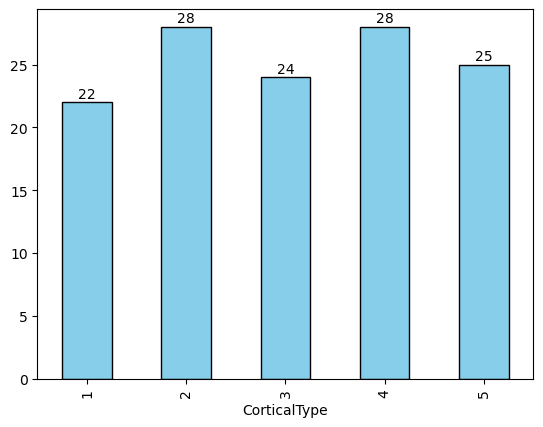

In [162]:
value_counts = SMI32_Tau_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

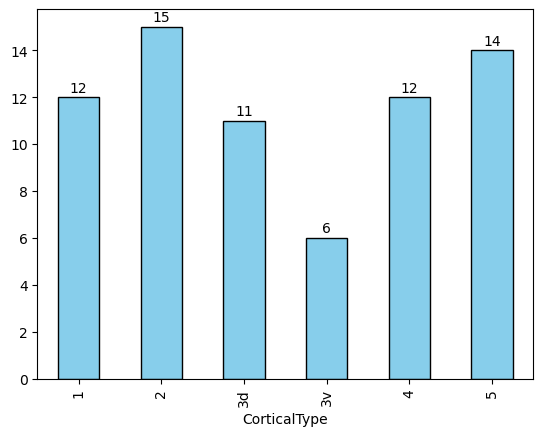

In [163]:
value_counts = SMI32_Tau_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

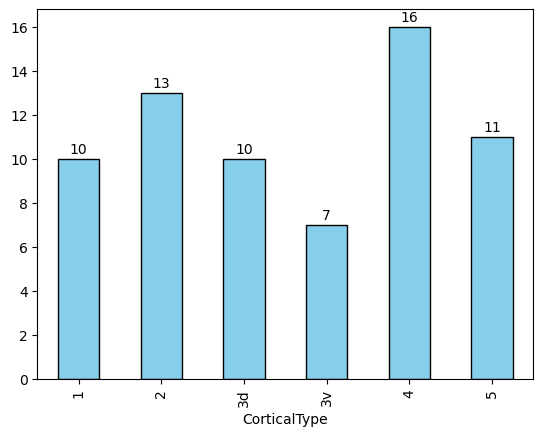

In [164]:
value_counts = SMI32_Tau_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [165]:
# Left
SMI32_Tau_L_formatted = pd.pivot_table(SMI32_Tau_L_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
SMI32_Tau_R_formatted = pd.pivot_table(SMI32_Tau_R_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [166]:
# Left
SMI32_Tau_L = SMI32_Tau_L_formatted.to_numpy()
print(f"Shape of SMI32_Tau Left numpy data: {SMI32_Tau_L.shape}")

# Right
SMI32_Tau_R = SMI32_Tau_R_formatted.to_numpy()
print(f"Shape of SMI32_Tau Right numpy data: {SMI32_Tau_R.shape}")

Shape of SMI32_Tau Left numpy data: (16, 12)
Shape of SMI32_Tau Right numpy data: (17, 12)


#### Get Age, Sex, and L1-6_NeuN

In [167]:
formatted_data_L = pd.pivot_table(SMI32_Tau_L_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

SMI32_Tau_Age_L = formatted_data_L.index.get_level_values('AgeatDeath').tolist()
SMI32_Tau_Sex_L = formatted_data_L.index.get_level_values('Sex').tolist()
SMI32_Tau_ADNC_L = formatted_data_L.index.get_level_values('ADNC').tolist()
SMI32_Tau_NeuN_1_L = formatted_data_L.reset_index()['L1-6_NeuN']['1'].tolist()
SMI32_Tau_NeuN_2_L = formatted_data_L.reset_index()['L1-6_NeuN']['2'].tolist()
SMI32_Tau_NeuN_3d_L = formatted_data_L.reset_index()['L1-6_NeuN']['3d'].tolist()
SMI32_Tau_NeuN_3v_L = formatted_data_L.reset_index()['L1-6_NeuN']['3v'].tolist()
SMI32_Tau_NeuN_4_L = formatted_data_L.reset_index()['L1-6_NeuN']['4'].tolist()
SMI32_Tau_NeuN_5_L = formatted_data_L.reset_index()['L1-6_NeuN']['5'].tolist()

formatted_data_R = pd.pivot_table(SMI32_Tau_R_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

SMI32_Tau_Age_R = formatted_data_R.index.get_level_values('AgeatDeath').tolist()
SMI32_Tau_Sex_R = formatted_data_R.index.get_level_values('Sex').tolist()
SMI32_Tau_ADNC_R = formatted_data_R.index.get_level_values('ADNC').tolist()
SMI32_Tau_NeuN_1_R = formatted_data_R.reset_index()['L1-6_NeuN']['1'].tolist()
SMI32_Tau_NeuN_2_R = formatted_data_R.reset_index()['L1-6_NeuN']['2'].tolist()
SMI32_Tau_NeuN_3d_R = formatted_data_R.reset_index()['L1-6_NeuN']['3d'].tolist()
SMI32_Tau_NeuN_3v_R = formatted_data_R.reset_index()['L1-6_NeuN']['3v'].tolist()
SMI32_Tau_NeuN_4_R = formatted_data_R.reset_index()['L1-6_NeuN']['4'].tolist()
SMI32_Tau_NeuN_5_R = formatted_data_R.reset_index()['L1-6_NeuN']['5'].tolist()

### SMI32_TDP_df to numpy

In [168]:
# L+R
SMI32_TDP_IDs = np.sort(SMI32_TDP_df['AutopsyID'].unique())
print(SMI32_TDP_IDs)
print(f"Number of unique IDs in SMI32 TDP: {len(SMI32_TDP_IDs)}")

['1995-005' '1995-217' '1999-170' '2000-149' '2001-108' '2001-122'
 '2002-025' '2002-070' '2002-238' '2003-044' '2003-114' '2004-008'
 '2004-158' '2005-208' '2006-123' '2007-039' '2007-111' '2007-148'
 '2008-001' '2008-156' '2008-205' '2009-033' '2009-097' '2009-119'
 '2009-168' '2011-191' '2011-257' '2011-269' '2012-124' '2014-087'
 '2015-008' '2015-044' '2015-062' '2015-116' '2015-118' '2016-009'
 '2016-037' '2016-161' '2016-165' '2016-241' '2017-149' '2017-190'
 '2018-066' '2018-129' '2018-146' '2018-178' '2018-208']
Number of unique IDs in SMI32 TDP: 47


In [169]:
# Left
SMI32_TDP_L_IDs = np.sort(SMI32_TDP_L_df['AutopsyID'].unique())
print(SMI32_TDP_L_IDs)
print(f"Number of unique IDs in SMI32 TDP Left: {len(SMI32_TDP_L_IDs)}")

# Right
SMI32_TDP_R_IDs = np.sort(SMI32_TDP_R_df['AutopsyID'].unique())
print(SMI32_TDP_R_IDs)
print(f"Number of unique IDs in SMI32 TDP Right: {len(SMI32_TDP_R_IDs)}")

['1999-170' '2001-108' '2001-122' '2002-025' '2002-238' '2003-044'
 '2003-114' '2004-008' '2004-158' '2005-208' '2007-039' '2007-148'
 '2008-205' '2009-033' '2009-097' '2009-168' '2011-191' '2011-257'
 '2011-269' '2015-008' '2015-044' '2015-062' '2015-118' '2016-009'
 '2016-037' '2016-161' '2016-165' '2016-241' '2017-149' '2018-129'
 '2018-146' '2018-178' '2018-208']
Number of unique IDs in SMI32 TDP Left: 33
['1995-005' '1995-217' '2000-149' '2002-070' '2005-208' '2006-123'
 '2007-111' '2008-001' '2008-156' '2009-033' '2009-119' '2009-168'
 '2011-257' '2011-269' '2012-124' '2014-087' '2015-008' '2015-044'
 '2015-062' '2015-116' '2015-118' '2016-009' '2016-161' '2017-190'
 '2018-066' '2018-129' '2018-146' '2018-208']
Number of unique IDs in SMI32 TDP Right: 28


In [170]:
L_R = pd.DataFrame({'L_R': SMI32_TDP_IDs})
L = pd.DataFrame({'L': SMI32_TDP_L_IDs})
R = pd.DataFrame({'R': SMI32_TDP_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,1995-005,NaN,1995-005
1,1995-217,NaN,1995-217
2,1999-170,1999-170,NaN
3,2000-149,NaN,2000-149
4,2001-108,2001-108,NaN
5,2001-122,2001-122,NaN
6,2002-025,2002-025,NaN
7,2002-070,NaN,2002-070
8,2002-238,2002-238,NaN
9,2003-044,2003-044,NaN


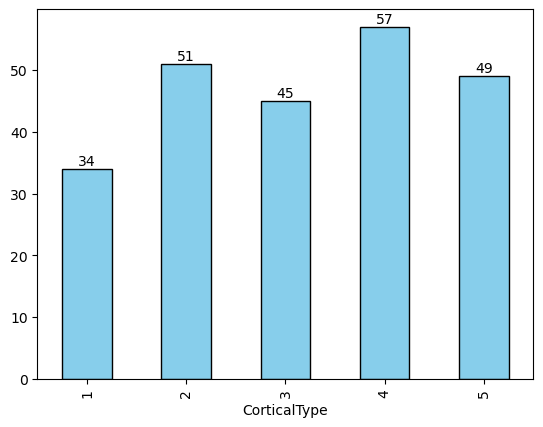

In [171]:
value_counts = SMI32_TDP_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

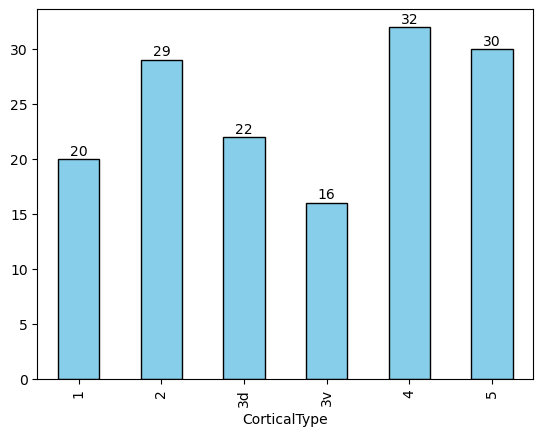

In [172]:
value_counts = SMI32_TDP_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

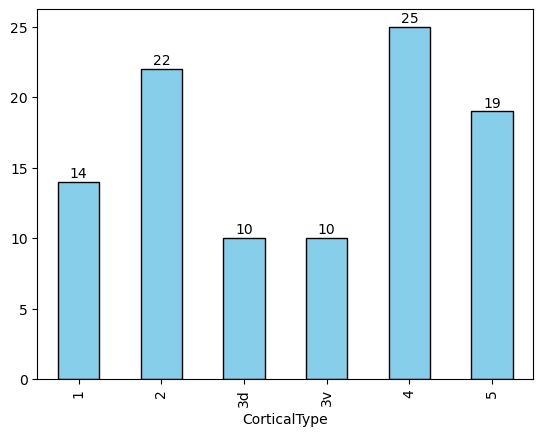

In [173]:
value_counts = SMI32_TDP_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [174]:
# Left
SMI32_TDP_L_formatted = pd.pivot_table(SMI32_TDP_L_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
SMI32_TDP_R_formatted = pd.pivot_table(SMI32_TDP_R_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [175]:
# Left
SMI32_TDP_L = SMI32_TDP_L_formatted.to_numpy()
print(f"Shape of SMI32_TDP Left numpy data: {SMI32_TDP_L.shape}")

# Right
SMI32_TDP_R = SMI32_TDP_R_formatted.to_numpy()
print(f"Shape of SMI32_TDP Right numpy data: {SMI32_TDP_R.shape}")

Shape of SMI32_TDP Left numpy data: (33, 12)
Shape of SMI32_TDP Right numpy data: (28, 12)


#### Get Age, Sex, and L1-6_NeuN

In [176]:
formatted_data_L = pd.pivot_table(SMI32_TDP_L_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

SMI32_TDP_Age_L = formatted_data_L.index.get_level_values('AgeatDeath').tolist()
SMI32_TDP_Sex_L = formatted_data_L.index.get_level_values('Sex').tolist()
SMI32_TDP_ADNC_L = formatted_data_L.index.get_level_values('ADNC').tolist()
SMI32_TDP_NeuN_1_L = formatted_data_L.reset_index()['L1-6_NeuN']['1'].tolist()
SMI32_TDP_NeuN_2_L = formatted_data_L.reset_index()['L1-6_NeuN']['2'].tolist()
SMI32_TDP_NeuN_3d_L = formatted_data_L.reset_index()['L1-6_NeuN']['3d'].tolist()
SMI32_TDP_NeuN_3v_L = formatted_data_L.reset_index()['L1-6_NeuN']['3v'].tolist()
SMI32_TDP_NeuN_4_L = formatted_data_L.reset_index()['L1-6_NeuN']['4'].tolist()
SMI32_TDP_NeuN_5_L = formatted_data_L.reset_index()['L1-6_NeuN']['5'].tolist()

formatted_data_R = pd.pivot_table(SMI32_TDP_R_df, values=['L1-6_NeuN', 'L23', 'L56'], 
                                   index=['AutopsyID', 'AgeatDeath', 'Sex', 'ADNC'], 
                                   columns=['CorticalType'])

SMI32_TDP_Age_R = formatted_data_R.index.get_level_values('AgeatDeath').tolist()
SMI32_TDP_Sex_R = formatted_data_R.index.get_level_values('Sex').tolist()
SMI32_TDP_ADNC_R = formatted_data_R.index.get_level_values('ADNC').tolist()
SMI32_TDP_NeuN_1_R = formatted_data_R.reset_index()['L1-6_NeuN']['1'].tolist()
SMI32_TDP_NeuN_2_R = formatted_data_R.reset_index()['L1-6_NeuN']['2'].tolist()
SMI32_TDP_NeuN_3d_R = formatted_data_R.reset_index()['L1-6_NeuN']['3d'].tolist()
SMI32_TDP_NeuN_3v_R = formatted_data_R.reset_index()['L1-6_NeuN']['3v'].tolist()
SMI32_TDP_NeuN_4_R = formatted_data_R.reset_index()['L1-6_NeuN']['4'].tolist()
SMI32_TDP_NeuN_5_R = formatted_data_R.reset_index()['L1-6_NeuN']['5'].tolist()

# Verifying that correct formating

## Shape of dataset

In [177]:
print(NeuN_HC_L.shape)
print(NeuN_Tau_L.shape)
print(NeuN_TDP_L.shape)

print(NeuN_HC_R.shape)
print(NeuN_Tau_R.shape)
print(NeuN_TDP_R.shape)

(18, 12)
(16, 12)
(33, 12)
(14, 12)
(16, 12)
(28, 12)


In [178]:
print(SMI32_HC_L.shape)
print(SMI32_Tau_L.shape)
print(SMI32_TDP_L.shape)

print(SMI32_HC_R.shape)
print(SMI32_Tau_R.shape)
print(SMI32_TDP_R.shape)

(18, 12)
(16, 12)
(33, 12)
(14, 12)
(17, 12)
(28, 12)


# Check if the IDs of NeuN and SMI32 are same for each HC, Tau, and TDP

In [179]:
np.array_equal(np.sort(NeuN_HC_L_IDs), np.sort(SMI32_HC_L_IDs))

True

In [180]:
np.array_equal(np.sort(NeuN_HC_R_IDs), np.sort(SMI32_HC_R_IDs))

True

In [181]:
np.array_equal(np.sort(NeuN_Tau_L_IDs), np.sort(SMI32_Tau_L_IDs))

True

In [182]:
# False expected, additional 2017-187 in SMI32_Tau_R_IDs
np.array_equal(np.sort(NeuN_Tau_R_IDs), np.sort(SMI32_Tau_R_IDs))

False

In [183]:
np.array_equal(np.sort(NeuN_TDP_L_IDs), np.sort(SMI32_TDP_L_IDs))

True

In [184]:
np.array_equal(np.sort(NeuN_TDP_R_IDs), np.sort(SMI32_TDP_R_IDs))

True

# Save the Data

In [185]:
# NeuN_HC_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_L, f)
f.close()

# NeuN_Tau_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_L, f)
f.close()

# NeuN_TDP_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_L, f)
f.close()

# NeuN_HC_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_R, f)
f.close()

# NeuN_Tau_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_R, f)
f.close()

# NeuN_TDP_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_R, f)
f.close()

In [186]:
# SMI32_HC_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_L, f)
f.close()

# SMI32_Tau_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_L, f)
f.close()

# SMI32_TDP_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_L, f)
f.close()

# SMI32_HC_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_R, f)
f.close()

# SMI32_Tau_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_R, f)
f.close()

# SMI32_TDP_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_R, f)
f.close()

## Save Age, Sex, and L1-6_NeuN

In [187]:
# NeuN_HC_Age_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_Age_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_Age_L, f)
f.close()

# NeuN_HC_Sex_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_Sex_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_Sex_L, f)
f.close()

# NeuN_HC_ADNC_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_ADNC_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_ADNC_L, f)
f.close()

# NeuN_HC_NeuN_1_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_1_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_1_L, f)
f.close()

# NeuN_HC_NeuN_2_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_2_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_2_L, f)
f.close()

# NeuN_HC_NeuN_3d_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_3d_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_3d_L, f)
f.close()

# NeuN_HC_NeuN_3v_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_3v_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_3v_L, f)
f.close()

# NeuN_HC_NeuN_4_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_4_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_4_L, f)
f.close()

# NeuN_HC_NeuN_5_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_5_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_5_L, f)
f.close()

#-----

# NeuN_HC_Age_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_Age_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_Age_R, f)
f.close()

# NeuN_HC_Sex_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_Sex_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_Sex_R, f)
f.close()

# NeuN_HC_ADNC_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_ADNC_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_ADNC_R, f)
f.close()

# NeuN_HC_NeuN_1_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_1_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_1_R, f)
f.close()

# NeuN_HC_NeuN_2_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_2_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_2_R, f)
f.close()

# NeuN_HC_NeuN_3d_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_3d_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_3d_R, f)
f.close()

# NeuN_HC_NeuN_3v_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_3v_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_3v_R, f)
f.close()

# NeuN_HC_NeuN_4_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_4_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_4_R, f)
f.close()

# NeuN_HC_NeuN_5_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_NeuN_5_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_NeuN_5_R, f)
f.close()

In [188]:
# NeuN_Tau_Age_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_Age_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_Age_L, f)
f.close()

# NeuN_Tau_Sex_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_Sex_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_Sex_L, f)
f.close()

# NeuN_Tau_ADNC_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_ADNC_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_ADNC_L, f)
f.close()

# NeuN_Tau_NeuN_1_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_1_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_1_L, f)
f.close()

# NeuN_Tau_NeuN_2_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_2_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_2_L, f)
f.close()

# NeuN_Tau_NeuN_3d_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_3d_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_3d_L, f)
f.close()

# NeuN_Tau_NeuN_3v_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_3v_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_3v_L, f)
f.close()

# NeuN_Tau_NeuN_4_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_4_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_4_L, f)
f.close()

# NeuN_Tau_NeuN_5_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_5_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_5_L, f)
f.close()

#-----

# NeuN_Tau_Age_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_Age_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_Age_R, f)
f.close()

# NeuN_Tau_Sex_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_Sex_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_Sex_R, f)
f.close()

# NeuN_Tau_ADNC_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_ADNC_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_ADNC_R, f)
f.close()

# NeuN_Tau_NeuN_1_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_1_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_1_R, f)
f.close()

# NeuN_Tau_NeuN_2_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_2_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_2_R, f)
f.close()

# NeuN_Tau_NeuN_3d_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_3d_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_3d_R, f)
f.close()

# NeuN_Tau_NeuN_3v_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_3v_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_3v_R, f)
f.close()

# NeuN_Tau_NeuN_4_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_4_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_4_R, f)
f.close()

# NeuN_Tau_NeuN_5_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_NeuN_5_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_NeuN_5_R, f)
f.close()

In [189]:
# NeuN_TDP_Age_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_Age_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_Age_L, f)
f.close()

# NeuN_TDP_Sex_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_Sex_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_Sex_L, f)
f.close()

# NeuN_TDP_ADNC_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_ADNC_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_ADNC_L, f)
f.close()

# NeuN_TDP_NeuN_1_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_1_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_1_L, f)
f.close()

# NeuN_TDP_NeuN_2_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_2_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_2_L, f)
f.close()

# NeuN_TDP_NeuN_3d_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_3d_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_3d_L, f)
f.close()

# NeuN_TDP_NeuN_3v_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_3v_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_3v_L, f)
f.close()

# NeuN_TDP_NeuN_4_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_4_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_4_L, f)
f.close()

# NeuN_TDP_NeuN_5_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_5_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_5_L, f)
f.close()

#-----

# NeuN_TDP_Age_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_Age_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_Age_R, f)
f.close()

# NeuN_TDP_Sex_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_Sex_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_Sex_R, f)
f.close()

# NeuN_TDP_ADNC_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_ADNC_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_ADNC_R, f)
f.close()

# NeuN_TDP_NeuN_1_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_1_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_1_R, f)
f.close()

# NeuN_TDP_NeuN_2_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_2_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_2_R, f)
f.close()

# NeuN_TDP_NeuN_3d_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_3d_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_3d_R, f)
f.close()

# NeuN_TDP_NeuN_3v_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_3v_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_3v_R, f)
f.close()

# NeuN_TDP_NeuN_4_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_4_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_4_R, f)
f.close()

# NeuN_TDP_NeuN_5_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_NeuN_5_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_NeuN_5_R, f)
f.close()

In [190]:
# SMI32_HC_Age_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_Age_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_Age_L, f)
f.close()

# SMI32_HC_Sex_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_Sex_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_Sex_L, f)
f.close()

# SMI32_HC_ADNC_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_ADNC_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_ADNC_L, f)
f.close()

# SMI32_HC_NeuN_1_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_1_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_1_L, f)
f.close()

# SMI32_HC_NeuN_2_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_2_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_2_L, f)
f.close()

# SMI32_HC_NeuN_3d_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_3d_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_3d_L, f)
f.close()

# SMI32_HC_NeuN_3v_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_3v_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_3v_L, f)
f.close()

# SMI32_HC_NeuN_4_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_4_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_4_L, f)
f.close()

# SMI32_HC_NeuN_5_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_5_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_5_L, f)
f.close()

#-----

# SMI32_HC_Age_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_Age_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_Age_R, f)
f.close()

# SMI32_HC_Sex_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_Sex_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_Sex_R, f)
f.close()

# SMI32_HC_ADNC_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_ADNC_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_ADNC_R, f)
f.close()

# SMI32_HC_NeuN_1_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_1_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_1_R, f)
f.close()

# SMI32_HC_NeuN_2_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_2_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_2_R, f)
f.close()

# SMI32_HC_NeuN_3d_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_3d_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_3d_R, f)
f.close()

# SMI32_HC_NeuN_3v_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_3v_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_3v_R, f)
f.close()

# SMI32_HC_NeuN_4_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_4_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_4_R, f)
f.close()

# SMI32_HC_NeuN_5_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_NeuN_5_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_NeuN_5_R, f)
f.close()

In [191]:
# SMI32_Tau_Age_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_Age_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_Age_L, f)
f.close()

# SMI32_Tau_Sex_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_Sex_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_Sex_L, f)
f.close()

# SMI32_Tau_ADNC_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_ADNC_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_ADNC_L, f)
f.close()

# SMI32_Tau_NeuN_1_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_1_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_1_L, f)
f.close()

# SMI32_Tau_NeuN_2_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_2_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_2_L, f)
f.close()

# SMI32_Tau_NeuN_3d_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_3d_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_3d_L, f)
f.close()

# SMI32_Tau_NeuN_3v_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_3v_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_3v_L, f)
f.close()

# SMI32_Tau_NeuN_4_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_4_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_4_L, f)
f.close()

# SMI32_Tau_NeuN_5_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_5_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_5_L, f)
f.close()

#-----

# SMI32_Tau_Age_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_Age_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_Age_R, f)
f.close()

# SMI32_Tau_Sex_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_Sex_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_Sex_R, f)
f.close()

# SMI32_Tau_ADNC_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_ADNC_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_ADNC_R, f)
f.close()

# SMI32_Tau_NeuN_1_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_1_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_1_R, f)
f.close()

# SMI32_Tau_NeuN_2_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_2_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_2_R, f)
f.close()

# SMI32_Tau_NeuN_3d_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_3d_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_3d_R, f)
f.close()

# SMI32_Tau_NeuN_3v_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_3v_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_3v_R, f)
f.close()

# SMI32_Tau_NeuN_4_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_4_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_4_R, f)
f.close()

# SMI32_Tau_NeuN_5_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_NeuN_5_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_NeuN_5_R, f)
f.close()

In [192]:
# SMI32_TDP_Age_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_Age_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_Age_L, f)
f.close()

# SMI32_TDP_Sex_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_Sex_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_Sex_L, f)
f.close()

# SMI32_TDP_ADNC_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_ADNC_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_ADNC_L, f)
f.close()

# SMI32_TDP_NeuN_1_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_1_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_1_L, f)
f.close()

# SMI32_TDP_NeuN_2_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_2_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_2_L, f)
f.close()

# SMI32_TDP_NeuN_3d_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_3d_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_3d_L, f)
f.close()

# SMI32_TDP_NeuN_3v_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_3v_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_3v_L, f)
f.close()

# SMI32_TDP_NeuN_4_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_4_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_4_L, f)
f.close()

# SMI32_TDP_NeuN_5_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_5_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_5_L, f)
f.close()

#-----

# SMI32_TDP_Age_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_Age_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_Age_R, f)
f.close()

# SMI32_TDP_Sex_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_Sex_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_Sex_R, f)
f.close()

# SMI32_TDP_ADNC_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_ADNC_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_ADNC_R, f)
f.close()

# SMI32_TDP_NeuN_1_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_1_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_1_R, f)
f.close()

# SMI32_TDP_NeuN_2_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_2_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_2_R, f)
f.close()

# SMI32_TDP_NeuN_3d_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_3d_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_3d_R, f)
f.close()

# SMI32_TDP_NeuN_3v_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_3v_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_3v_R, f)
f.close()

# SMI32_TDP_NeuN_4_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_4_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_4_R, f)
f.close()

# SMI32_TDP_NeuN_5_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_NeuN_5_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_NeuN_5_R, f)
f.close()